In [325]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

## SETUP 1 - MODEL FREE learning

tensor(0.0206)


C:\Users\siddp\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


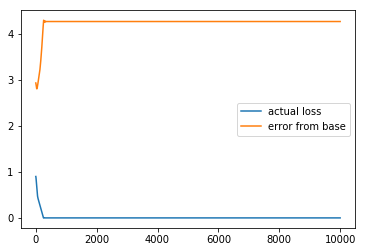

0.0004877876490354538


In [484]:
d = 5 # dimension of data points x
n = 2 # number of data points
ntest = 10000
m = 5 # size of measurements b
noise = 0
X = np.random.uniform(-1/np.sqrt(d),1/np.sqrt(d),size = (n,d))
A = np.random.uniform(-1/np.sqrt(d),1/np.sqrt(d),(m,d))
B = np.matmul(A,X.T) 
B += noise*np.random.uniform(-1,1,size = B.shape)

X = torch.tensor(X)
A = torch.tensor(A)
B = torch.tensor(B)

C = torch.zeros((d,m),requires_grad = True)

#cov = np.matmul(X.transpose(0,1),X)
estimateML = np.matmul(np.matmul(cov,A.transpose(0,1)),
                           np.linalg.pinv(np.matmul(np.matmul(A,cov),
                                                    A.transpose(0,1))))


optimizer = optim.SGD([C], lr = 0.01, momentum = 0.9)

epochs = 10000
l = []
lbase = []
for i in range(epochs):
    optimizer.zero_grad()
    loss = torch.norm(C.matmul(B.float()).transpose(0,1) - X.float())
    loss.backward()
    optimizer.step()
    l.append(loss.item())
    lbase.append(torch.norm(C.detach() - estimateML.float()))
def test(C):
    Xtest = torch.tensor(np.random.uniform(-1,1,size = (ntest,d)))
    Btest = torch.tensor(np.matmul(A,Xtest.transpose(0,1)))
    
    return torch.norm(C.matmul(Btest.float()).transpose(0,1)-Xtest.float())/ntest
print(test(C.detach()))
plt.plot(l,label = 'actual loss')

plt.plot(lbase,label = 'error from base')
plt.legend()
plt.show()
print(l[-1])

## SETUP 2 - MODEL BASED LEARNING with step-size learning

C:\Users\siddp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(inf)


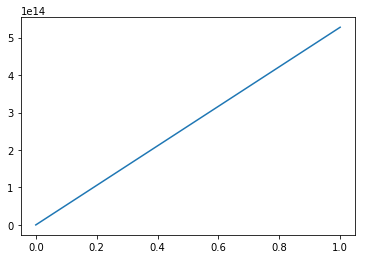

In [205]:
C = torch.ones((d,d),requires_grad = True)
eta = torch.tensor(1.0,requires_grad = True)
optimizer = optim.SGD([C,eta], lr = 0.01, momentum = 0.9)

epochs = 1000
l = []
for i in range(epochs):
    optimizer.zero_grad()
    
    #eta = 0.1
    temp = eta*A.transpose(0,1).matmul(B).float()
    temp1 = 2*torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    loss = torch.norm(temp1.matmul(temp) - X.transpose(0,1).float())
    loss.backward()
    optimizer.step()
    l.append(loss.item())
def test(C,eta):
    Xtest = torch.tensor(np.random.uniform(-1,1,size = (ntest,d)))
    Btest = torch.tensor(np.matmul(A,Xtest.transpose(0,1)))
    #eta = 0.1
    temp = eta*A.transpose(0,1).matmul(Btest).float()
    temp1 = 2*torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    return torch.norm(temp1.matmul(temp) - Xtest.transpose(0,1).float())/ntest

print(test(C.detach(),eta.detach()))
plt.plot(l)
plt.show()

## MODEL BASED LEARNING NOT LEARNING STEP-SIZE

tensor(0.0166) test no learn tensor(0.0171)


C:\Users\siddp\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


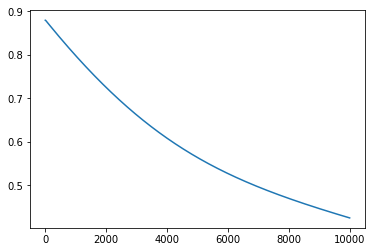

0.42491135001182556


In [470]:
C = torch.ones((d,d),requires_grad = True)
eta = .1
optimizer = optim.SGD([C], lr = 1, momentum = 0.9)

epochs = 10000
l = []
for i in range(epochs):
    optimizer.zero_grad()
    
    temp = eta*A.transpose(0,1).matmul(B).float()
    temp1 = 2*torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    loss = torch.norm(temp1.matmul(temp) - X.transpose(0,1).float())
    loss.backward()
    optimizer.step()
    l.append(loss.item())
def test(C,eta, algorithm ):
    Xtest = torch.tensor(np.random.uniform(-1,1,size = (ntest,d)))
    Btest = torch.tensor(np.matmul(A,Xtest.transpose(0,1)))

    temp = eta*A.transpose(0,1).matmul(Btest).float()
    if algorithm == 'no learn':
        temp1 = 2*torch.eye(d) - eta*A.transpose(0,1).matmul(A).float()
    else:
        temp1 = 2*torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    return torch.norm(temp1.matmul(temp) - Xtest.transpose(0,1).float())/ntest



print(test(C.detach(),eta, 'learn'), 'test no learn', test(C.detach(),eta,'no learn'))
plt.plot(l)
plt.show()
print(l[-1])

## MODEL BASED LEARNING 2 iterations

tensor(85.9057)


C:\Users\siddp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


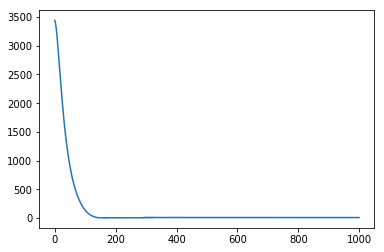

In [210]:
C = torch.ones((d,d),requires_grad = True)
C1 = torch.ones((d,d),requires_grad = True)
eta = .1
optimizer = optim.SGD([C,C1], lr = 0.01, momentum = 0.9)

epochs = 1000
l = []
for i in range(epochs):
    optimizer.zero_grad()
    
    temp = eta*A.transpose(0,1).matmul(B).float()
    temp1 = torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    temp2 = torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C1
    temp3 = (torch.eye(d) + temp1 + temp1.matmul(temp2)).matmul(temp)
    loss = torch.norm(temp3 - X.transpose(0,1).float())
    loss.backward()
    optimizer.step()
    l.append(loss.item())
def test(C,C1,eta):
    Xtest = torch.tensor(np.random.uniform(-1,1,size = (ntest,d)))
    Btest = torch.tensor(np.matmul(A,Xtest.transpose(0,1)))

    temp = eta*A.transpose(0,1).matmul(Btest).float()
    temp1 = torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C
    temp2 = torch.eye(d) - eta*A.transpose(0,1).matmul(A).float() - eta*C1
    temp3 = (torch.eye(d) + temp1 + temp1.matmul(temp2)).matmul(temp)
    loss = torch.norm(temp3 - Xtest.transpose(0,1).float())/ntest
    return loss

print(test(C.detach(),C1.detach(),eta))
plt.plot(l)
plt.show() 

## Theoritical bounds

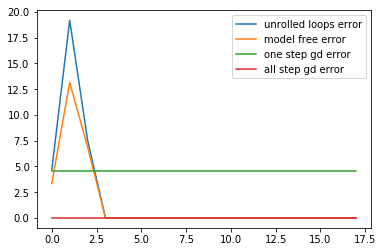

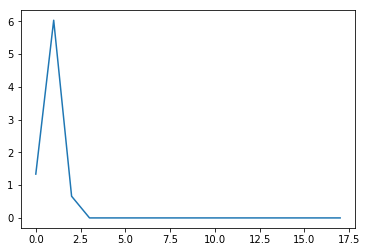

In [468]:
unroll = []
modelfree = []
onestepgd = []
d = 5 # dimension of data points x
m = 5 # size of measurements b
#sigma = np.linspace(0.0001,1,d)
Sigma = np.eye(d)#np.random.uniform(0,1,size = (d,d))#np.diag(sigma)
A = np.random.uniform(-1/np.sqrt(d),1/np.sqrt(d),(m,d))
eta = 0.1
ata = np.matmul(A.T,A)
for n in range(2,20):
    X = np.random.uniform(-1/np.sqrt(d),1/np.sqrt(d),size = (n,d))#np.random.binomial(size=(n,d), n=1, p= 0.1)#np.random.uniform(-1/np.sqrt(d),1/np.sqrt(d),size = (n,d))##
    cov = np.matmul(X.T,X)
    
    #estimateUL = np.matmul(np.matmul(cov,ata), 
    #                       np.linalg.pinv(np.matmul(np.matmul(A,cov),ata)))
    
    atacovata = np.matmul(np.matmul(ata,cov),ata)
    covataInvatacovata = np.matmul(np.matmul(cov,ata),
                                   np.linalg.pinv(atacovata,hermitian = True))
    
    atacovataInvatacovata = np.matmul(atacovata,
                                   np.linalg.pinv(atacovata,hermitian = True))
    #etaeyeataat = np.matmul(eta*(2*np.eye(d) - eta*ata), A.T) 
    covataInvatacovataat =  np.matmul(covataInvatacovata,A.T)
    
    etaeyeataatacovataInvatacovataat = np.matmul(np.matmul(
                                    eta*(2*np.eye(d) - eta*ata), 
                                np.eye(d) - atacovataInvatacovata),A.T)
    estimateUL =  covataInvatacovataat 
    + etaeyeataatacovataInvatacovataat
    #print(sum(np.diag(atacovataInvatacovata)) )
    #plt.figure(n)
    #plt.imshow(atacovataInvatacovata)
    #plt.show()
    estimateML = np.matmul(np.matmul(cov,A.T),
                           np.linalg.pinv(np.matmul(np.matmul(A,cov),A.T)))
    
    ULerror = np.matrix.trace(np.matmul(np.matmul(
        np.matmul(estimateUL,A)-np.eye(d),Sigma),
                                        np.matmul(estimateUL,A).T-np.eye(d)))
    
    MLerror = np.matrix.trace(np.matmul(np.matmul(
        np.matmul(estimateML,A)-np.eye(d),
        Sigma),np.matmul(estimateML,A).T-np.eye(d)))
    unroll.append(ULerror)
    modelfree.append(MLerror)
estimateonestepgd = np.matmul(eta*(2*np.eye(d) - eta*ata), A.T)
gdonesteperror = np.matrix.trace(np.matmul(np.matmul(
        np.matmul(estimateonestepgd,A)-np.eye(d),Sigma),
                    np.matmul(estimateonestepgd,A).T-np.eye(d)))    
onestepgd = [gdonesteperror]*len(unroll)
allstepgd = [ np.matrix.trace(np.matmul(
    np.matmul(np.linalg.pinv(A),A)-np.eye(d),
    np.matmul(np.linalg.pinv(A),A).T-np.eye(d))) ]*len(onestepgd)
plt.plot(unroll,label = 'unrolled loops error')
plt.plot(modelfree, label = 'model free error')
plt.plot(onestepgd, label = 'one step gd error')
plt.plot(allstepgd,label = 'all step gd error')
plt.legend()
plt.show()
plt.plot(np.array(unroll)-np.array(modelfree))

In [453]:
np.matmul(atacovata,np.linalg.pinv(atacovata,hermitian = True))

array([[ 0.1262422 ,  0.02747245,  0.05992019, ...,  0.04218681,
         0.02690706,  0.02947901],
       [ 0.02747245,  0.23176529,  0.02039793, ..., -0.06151398,
         0.04414359, -0.01012265],
       [ 0.05992019,  0.02039793,  0.23840251, ..., -0.02360158,
         0.07689473,  0.03131216],
       ...,
       [ 0.04218681, -0.06151398, -0.02360158, ...,  0.24910372,
         0.07277811,  0.00619566],
       [ 0.02690706,  0.04414359,  0.07689473, ...,  0.07277811,
         0.20647794,  0.09521745],
       [ 0.02947901, -0.01012265,  0.03131216, ...,  0.00619566,
         0.09521745,  0.18019729]])

In [454]:
np.allclose(atacovata,atacovata.T)

True

In [455]:
atacovata

array([[ 0.17534375,  0.12031348, -0.00345183, ..., -0.00193198,
         0.04781863,  0.04927669],
       [ 0.12031348,  0.46542051,  0.00410804, ..., -0.07741065,
         0.09833962, -0.04323484],
       [-0.00345183,  0.00410804,  0.44309538, ..., -0.05783202,
         0.09697044, -0.01911333],
       ...,
       [-0.00193198, -0.07741065, -0.05783202, ...,  0.20138107,
         0.04905351,  0.01782167],
       [ 0.04781863,  0.09833962,  0.09697044, ...,  0.04905351,
         0.34678384,  0.08607784],
       [ 0.04927669, -0.04323484, -0.01911333, ...,  0.01782167,
         0.08607784,  0.46332842]])